In [2]:
from azureml.core import Workspace, Dataset

subscription_id = '161c391c-34a1-495b-a7e5-a53aeefb8a6f'
resource_group = 'A5'
workspace_name = 'A5ML'

workspace = Workspace(subscription_id, resource_group, workspace_name)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import dataset as df
dataset = Dataset.get_by_name(workspace, name='data')
df = dataset.to_pandas_dataframe()
df.head()

,Column2,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [5]:
# Import label as dfy
datasety = Dataset.get_by_name(workspace, name='label')
dfy = datasety.to_pandas_dataframe()
dfy.head()

,Column2,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [9]:
# Drop column 2 from both data and label dataframes
df = df.drop(['Column2'], axis=1)
dfy = dfy.drop(['Column2'], axis=1)

In [10]:
# Check the dataset again if that works
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [11]:
# Check the label as well
dfy.head()

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA


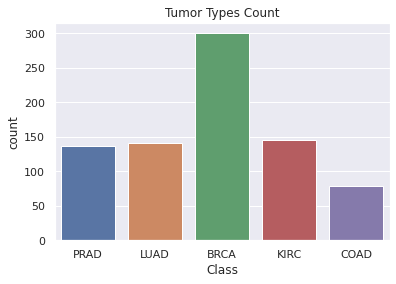

In [19]:
#Plot 1: Count Plot of the most common types of tumors
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Class", data=dfy).set_title('Tumor Types Count')

In [36]:
#Plot 2: Most expressive genes
dfsum = pd.DataFrame(data={'genesum': df.sum(axis = 0, skipna = True)})
dfsum = dfsum.sort_values(by=['genesum'], ascending=False)
dfsum['percent']= dfsum['genesum']/dfsum['genesum'].sum()
dfsum.head(n=10)


,genesum,percent
gene_230,13160.783755,0.000124
gene_5380,13121.953027,0.000124
gene_232,12790.362477,0.000121
gene_18570,12637.975003,0.000119
gene_6857,12587.384907,0.000119
gene_5388,12542.593236,0.000118
gene_1322,12407.188121,0.000117
gene_6698,12300.686413,0.000116
gene_15242,12144.089558,0.000115
gene_3371,12070.594694,0.000114


In [38]:
#Plot 3: Most expressive samples
dfsum_sample = pd.DataFrame(data={'samplesum': df.sum(axis = 1, skipna = True)})
dfsum_sample = dfsum_sample.sort_values(by=['samplesum'], ascending=False)
dfsum_sample['percent']= dfsum_sample['samplesum']/dfsum_sample['samplesum'].sum()
dfsum_sample.head(n=10)

,samplesum,percent
798,145246.945578,0.001371
190,141222.453479,0.001333
218,140644.243165,0.001327
419,140222.263054,0.001323
318,139276.152615,0.001314
675,139079.828486,0.001313
37,139017.237244,0.001312
635,138933.916436,0.001311
523,138773.573543,0.001310
513,138691.346159,0.001309


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
principalDf['class'] = dfy['Class']
principalDf.head()

,pc1,pc2,class
0,-62.755415,-94.071974,PRAD
1,-2.432896,90.585842,LUAD
2,-71.266853,-8.064607,PRAD
3,-84.770785,-73.244566,PRAD
4,-69.560171,-9.612940,BRCA


In [28]:
datastore = workspace.get_default_datastore()
Dataset.Tabular.register_pandas_dataframe(principalDf,datastore,'pcdf')

Method register_pandas_dataframe: This is an experimental method, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.


Validating arguments.
Arguments validated.
Successfully obtained datastore reference and path.
Uploading file to managed-dataset/38247041-0eab-4aed-b65a-8e4f4862c805/
Successfully uploaded file to datastore.
Creating and registering a new dataset.
Successfully created and registered a new dataset.


{
  "source": [
    "('workspaceblobstore', 'managed-dataset/38247041-0eab-4aed-b65a-8e4f4862c805/')"
  ],
  "definition": [
    "GetDatastoreFiles",
    "ReadParquetFile",
    "DropColumns"
  ],
  "registration": {
    "id": "1e655800-e319-4fa7-b57c-9801e076bc32",
    "name": "pcdf",
    "version": 1,
    "workspace": "Workspace.create(name='A5ML', subscription_id='161c391c-34a1-495b-a7e5-a53aeefb8a6f', resource_group='A5')"
  }
}

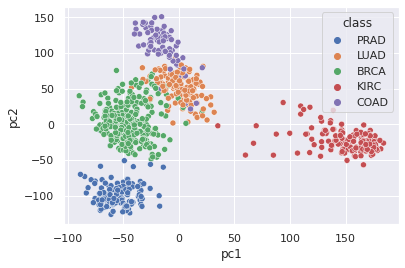

In [45]:
sns.scatterplot(data=principalDf, x="pc1", y="pc2", hue="class")

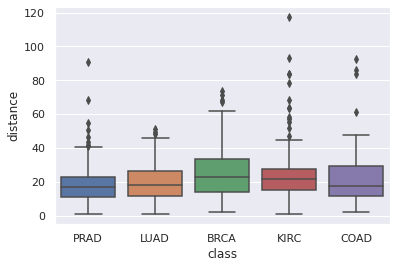

In [68]:
# Get average cluster mean and map it
principalDf_mean = principalDf.groupby('class').mean().reset_index()
principalDf_map = principalDf.merge(principalDf_mean, on=["class"])
principalDf_map['distance'] = np.sqrt((principalDf_map['pc1_x']-principalDf_map['pc1_y'])**2 + (principalDf_map['pc2_x']-principalDf_map['pc2_y'])**2)
ax = sns.boxplot(x="class", y="distance", data=principalDf_map)